In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

from functions import *
from models import *

import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2021-12-14 13:51:18.129403: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-14 13:51:18.159564: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2021-12-14 13:51:18.159735: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-12-14 13:51:18.161170: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-12-14 13:51:18.162869: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-12-14 13:51:18.163078: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

In [3]:
column_names = ["μ_δ", "μ_α", "δ", "α", "color", "mag", "lon", "lat", "μ_loncoslat", "μ_lat"]

In [4]:
gd1_stars = np.load('./gaia_data/gd1/gd1_stars.npy')

# Load a file and label the stream stars

In [ ]:
filename = "./gaia_data/gd1/gaiascan_l207.0_b50.2_ra148.6_dec24.2.npy"
df = pd.DataFrame(np.load(filename), columns = column_names)
is_stream, stream = FilterGD1(np.array(df), gd1_stars)

In [ ]:
plt.hist2d(df.μ_lat, df.μ_loncoslat, bins=np.linspace(-30,10,50));

In [ ]:
plt.hist2d(df.lon, df.lat, bins=100);

In [ ]:
plt.figure(dpi=100)
plt.scatter(df[is_stream].α, df[is_stream].δ)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\delta$")
plt.title("GD1 Stars in this Patch");

# Get GD1 stars from all patches

In [ ]:
patch_list = [
 # b = 33.7 
 './gaia_data/gd1/gaiascan_l195.0_b33.7_ra128.4_dec28.8.npy',
 './gaia_data/gd1/gaiascan_l210.0_b33.7_ra132.6_dec16.9.npy',
 './gaia_data/gd1/gaiascan_l225.0_b33.7_ra138.1_dec5.7.npy', 
 # b = 41.8 
 './gaia_data/gd1/gaiascan_l187.5_b41.8_ra136.5_dec36.1.npy',
 './gaia_data/gd1/gaiascan_l202.5_b41.8_ra138.8_dec25.1.npy',
 './gaia_data/gd1/gaiascan_l217.5_b41.8_ra142.7_dec14.5.npy', 
 # b = 50.2 
 './gaia_data/gd1/gaiascan_l99.0_b50.2_ra224.7_dec60.6.npy',
 './gaia_data/gd1/gaiascan_l117.0_b50.2_ra202.4_dec66.5.npy',
 './gaia_data/gd1/gaiascan_l135.0_b50.2_ra174.3_dec65.1.npy',
 './gaia_data/gd1/gaiascan_l153.0_b50.2_ra156.2_dec57.5.npy',
 './gaia_data/gd1/gaiascan_l171.0_b50.2_ra148.6_dec47.0.npy',
 './gaia_data/gd1/gaiascan_l189.0_b50.2_ra146.9_dec35.6.npy',
 './gaia_data/gd1/gaiascan_l207.0_b50.2_ra148.6_dec24.2.npy',
 # b = 58.4 
 './gaia_data/gd1/gaiascan_l101.2_b58.4_ra212.7_dec55.2.npy',
 './gaia_data/gd1/gaiascan_l123.8_b58.4_ra192.0_dec58.7.npy',
 './gaia_data/gd1/gaiascan_l146.2_b58.4_ra171.8_dec54.7.npy',
 './gaia_data/gd1/gaiascan_l168.8_b58.4_ra160.5_dec45.5.npy',
 './gaia_data/gd1/gaiascan_l191.2_b58.4_ra156.9_dec34.1.npy',
 # b = 66.4 
 './gaia_data/gd1/gaiascan_l105.0_b66.4_ra203.7_dec49.1.npy',
 './gaia_data/gd1/gaiascan_l135.0_b66.4_ra185.4_dec50.0.npy',
 './gaia_data/gd1/gaiascan_l165.0_b66.4_ra171.4_dec43.0.npy',    
]

In [ ]:
dfs = []

for file in tqdm(patch_list):
    df = pd.DataFrame(np.load(file), columns = column_names)
    is_stream, stream = FilterGD1(np.array(df), gd1_stars)
    df["stream"] = is_stream
    df["patch_id"] = patch_list.index(file)
    dfs.append(df)

In [ ]:
df_all = pd.concat([df for df in dfs])
df_all['α'] = df_all['α'].apply(lambda x: x if x > 100 else x + 360) # wrap around plot
df_all.to_hdf("gd1_allpatches.h5", key="df")

In [ ]:
gd1_stars_in_patches = pd.concat([df[df.stream] for df in dfs])

In [ ]:
plt.figure(dpi=150)
plt.scatter(gd1_stars_in_patches.α, gd1_stars_in_patches.δ, marker='.')
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\delta$")
plt.title("GD1 Stars in All Patches");

That's a little funky, let's modify it:

In [ ]:
gd1_stars_in_patches['α_new'] = gd1_stars_in_patches['α'].apply(lambda x: x if x > 100 else x + 360)

In [ ]:
plt.figure(figsize=(12,3),dpi=150)
plt.scatter(gd1_stars_in_patches.α_new, gd1_stars_in_patches.δ, marker='.', c=gd1_stars_in_patches.μ_δ)
plt.colorbar(label=r"$\mu_\delta$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\delta$")
plt.title("GD1 Stream (21 patches)");

# Run on an optimized tail patch

In [ ]:
df_all = pd.read_hdf("gd1_allpatches.h5")

In [ ]:
visualize_stream(df_all)

Define a new, optimized patch for the tail:

In [ ]:
df = df_all[(df_all.α > 185) & (df_all.α < 230)] # select just the tail area 
df.α = df.α - df.α.mean()
df.δ = df.δ - df.δ.mean()
df = df[df.α**2 + df.δ**2 < 15**2]

In [ ]:
visualize_stream(df)

In [ ]:
bins = np.linspace(-20,0,30) 
plt.hist(df[df.stream == False].μ_δ, density=True, color="gray", histtype="step", linewidth=2, 
         bins=bins, label="Background");
plt.hist(df[df.stream].μ_δ, density=True, color="deeppink", histtype="step", linewidth=2, 
         bins=bins, label="GD1")
plt.title('GD1 Tail')
plt.xlabel(r'$\mu_\delta$')
plt.ylabel('Counts (Normalized)')
plt.legend();

In [ ]:
df_train = signal_sideband(df, stream="gd1_tail",
                    sb_min = -8.5, 
                    sr_min = -6, 
                    sr_max = -1,
                    sb_max = 0
                        )

Add sample weights to stream stars:

In [ ]:
stream_weight = 3

### Throughout signal & sideband regions
df_train["weight"] = np.where(df_train['stream'] == True, stream_weight, 1)

In [ ]:
df_train.weight.value_counts()

Train:

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
train(df_train, 
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 64, 
      batch_size = 32, 
      dropout = 0.2, 
      epochs = 10, 
      patience = 30)

# Run on each of the 21 GD1 patches

In [5]:
df_all = pd.read_hdf("gd1_allpatches.h5")

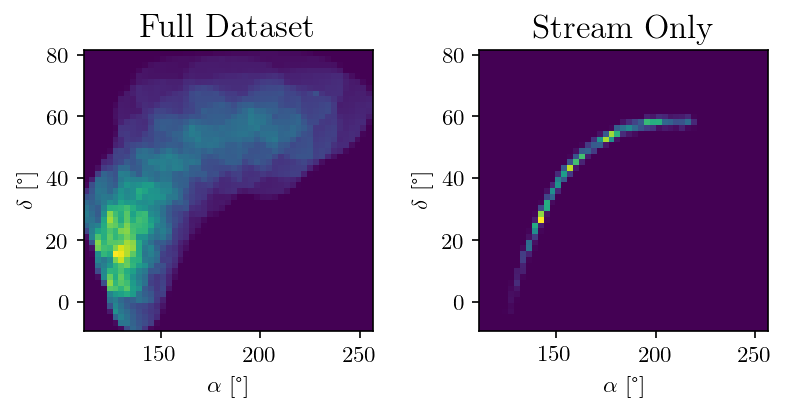

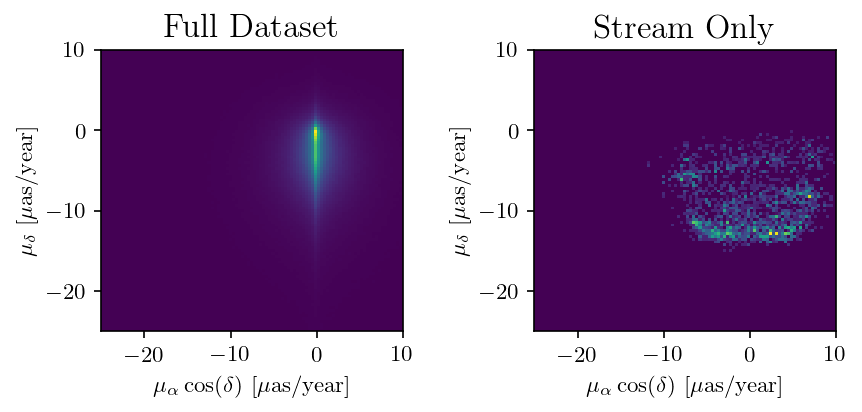

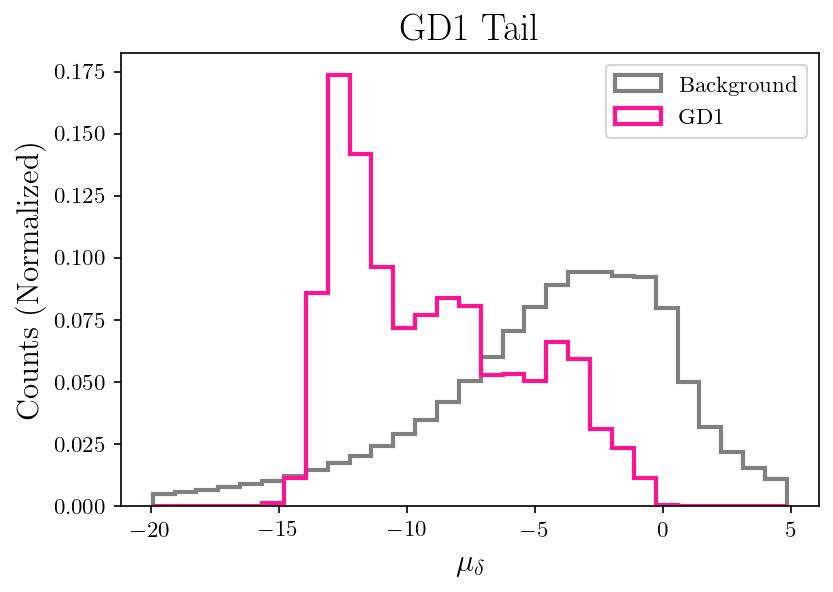

In [6]:
visualize_stream(df_all)

Run over each patch:

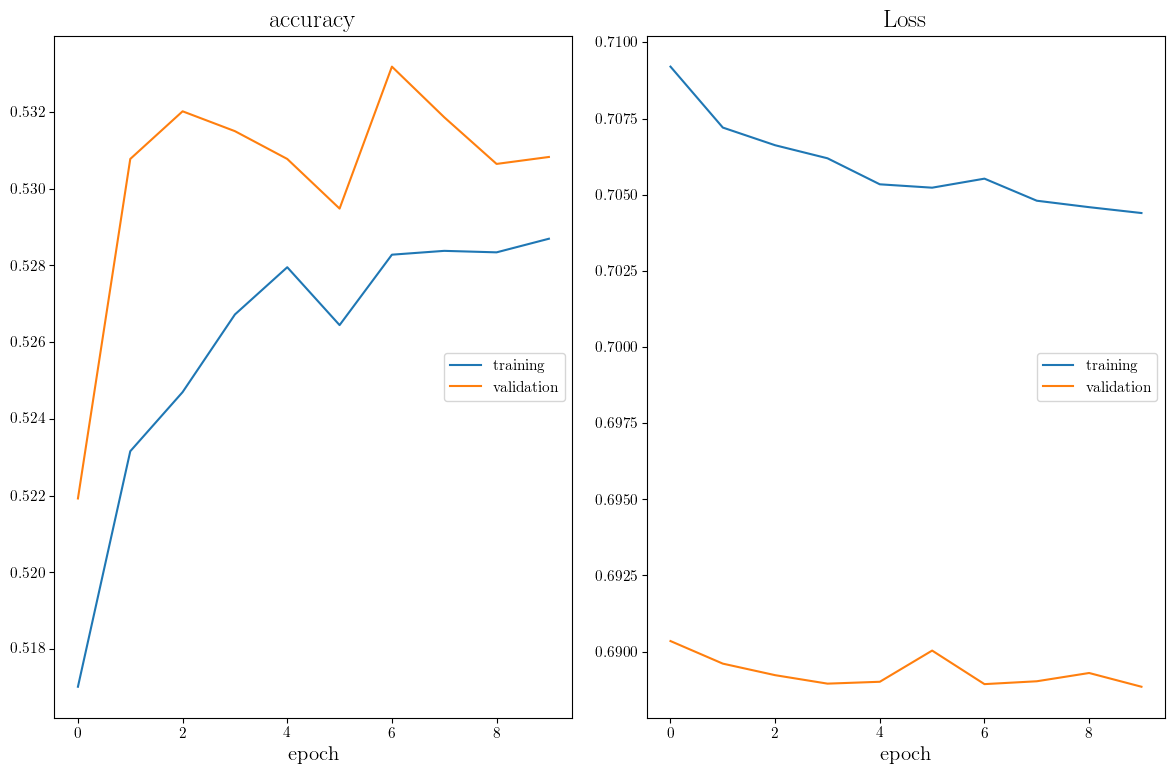

accuracy
	training         	 (min:    0.517, max:    0.529, cur:    0.529)
	validation       	 (min:    0.522, max:    0.533, cur:    0.531)
Loss
	training         	 (min:    0.704, max:    0.709, cur:    0.704)
	validation       	 (min:    0.689, max:    0.690, cur:    0.689)

Epoch 00010: val_loss improved from 0.68893 to 0.68884, saving model to ./trained_models/test/weights_loop0.h5
5638/5638 [==============================] - 18s 3ms/step - loss: 0.7044 - accuracy: 0.5287 - val_loss: 0.6888 - val_accuracy: 0.5308
Best losses: [0.7043983936309814]
Loading weights from best loop, i.e. loop #0.
AUC: 0.543
Maximum purity of 50.0% at 0.01%
Top 10 stars: Purity = 70.0% 
Top 100 stars: Purity = 38.0% 


100%|██████████| 21/21 [1:24:58<00:00, 242.78s/it]


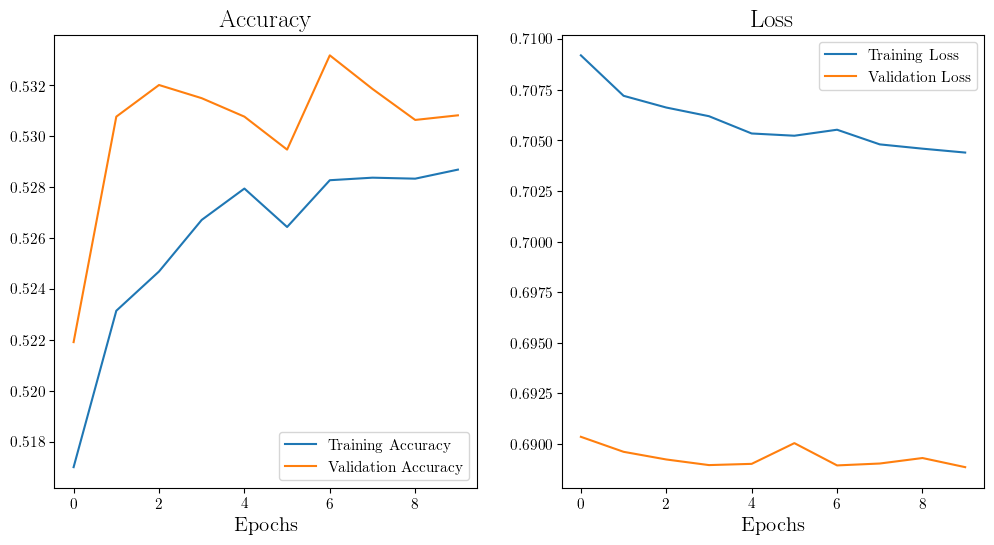

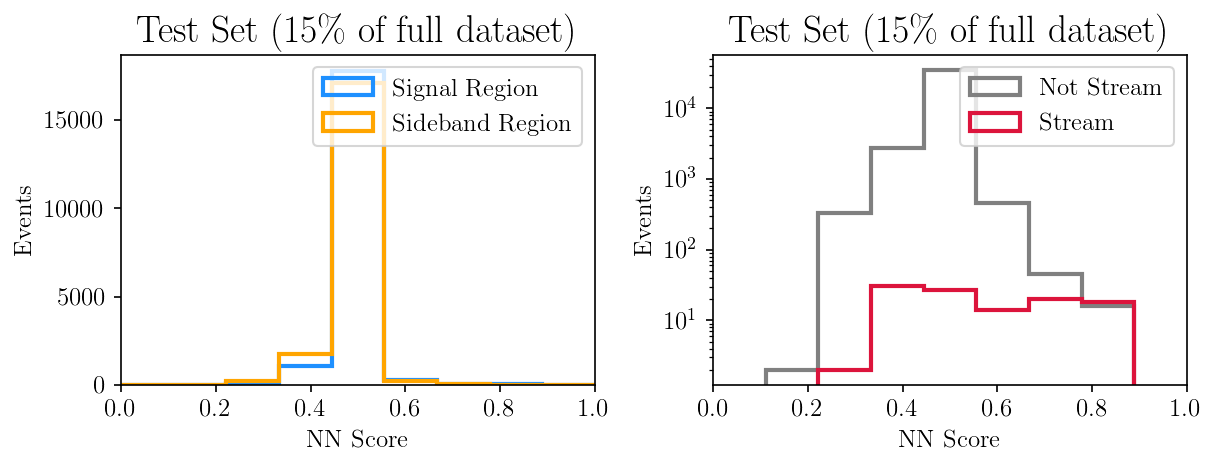

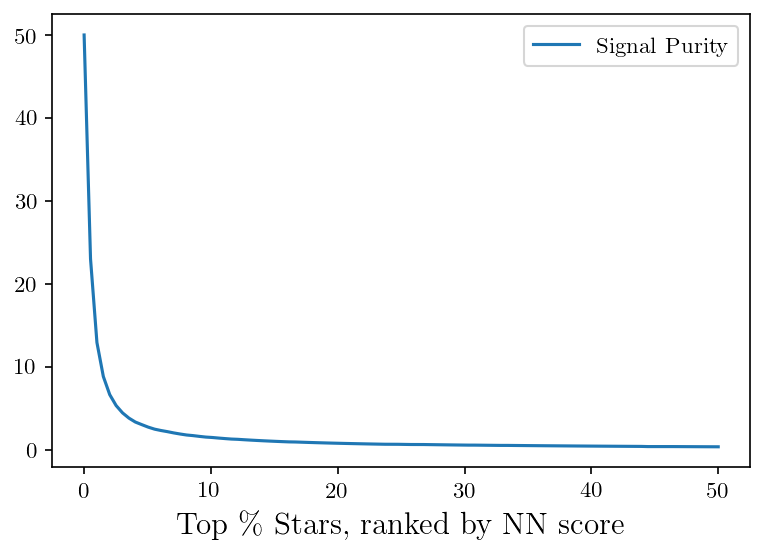

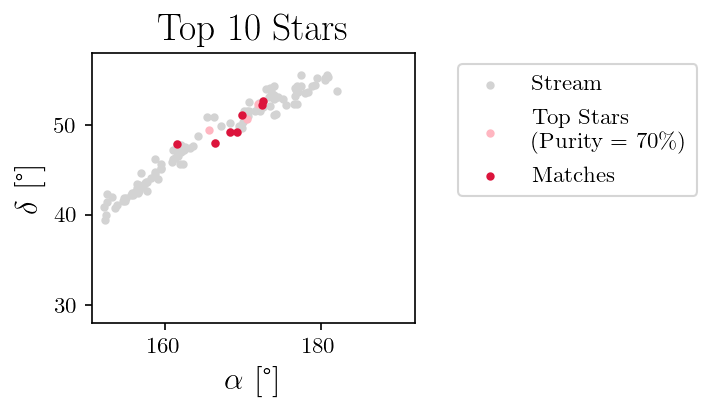

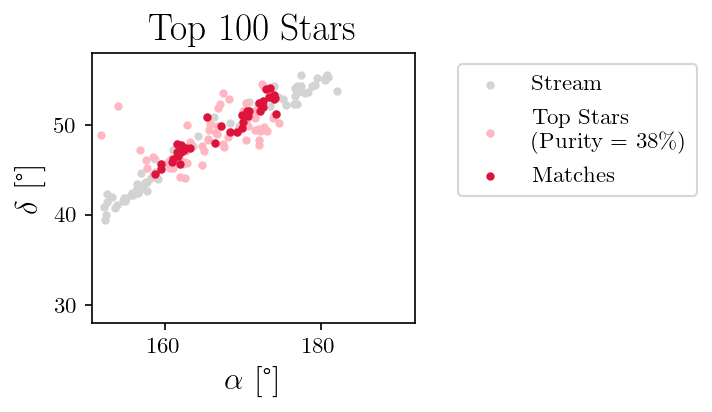

In [8]:
target_stream = []
top_100_stars = []

for patch_id in tqdm(df_all.patch_id.unique()):
    df = df_all[(df_all.patch_id == patch_id)]
    visualize_stream(df)
    target_stream.append(df[df.stream])
#     top_100_stars.append(df.sample(n=100))
    df_train = signal_sideband(df,
                    sb_min = df[df.stream].μ_δ.quantile(0.01), 
                    sr_min = df[df.stream].μ_δ.quantile(0.2), 
                    sr_max = df[df.stream].μ_δ.quantile(0.8),
                    sb_max = df[df.stream].μ_δ.quantile(0.99)
                        )
    ### Add stream weights
    stream_weight = 10
    df_train["weight"] = np.where(df_train['stream'] == True, stream_weight, 1)
    
    tf.keras.backend.clear_session()
    test = train(df_train, 
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 64, 
      batch_size = 32, 
      dropout = 0.2, 
      epochs = 10, 
      patience = 30)
    top_100_stars.append(test.sort_values('nn_score',ascending=False)[:100])

In [9]:
all_gd1_stars = pd.concat([df for df in target_stream])
cwola_stars = pd.concat([df for df in top_100_stars])

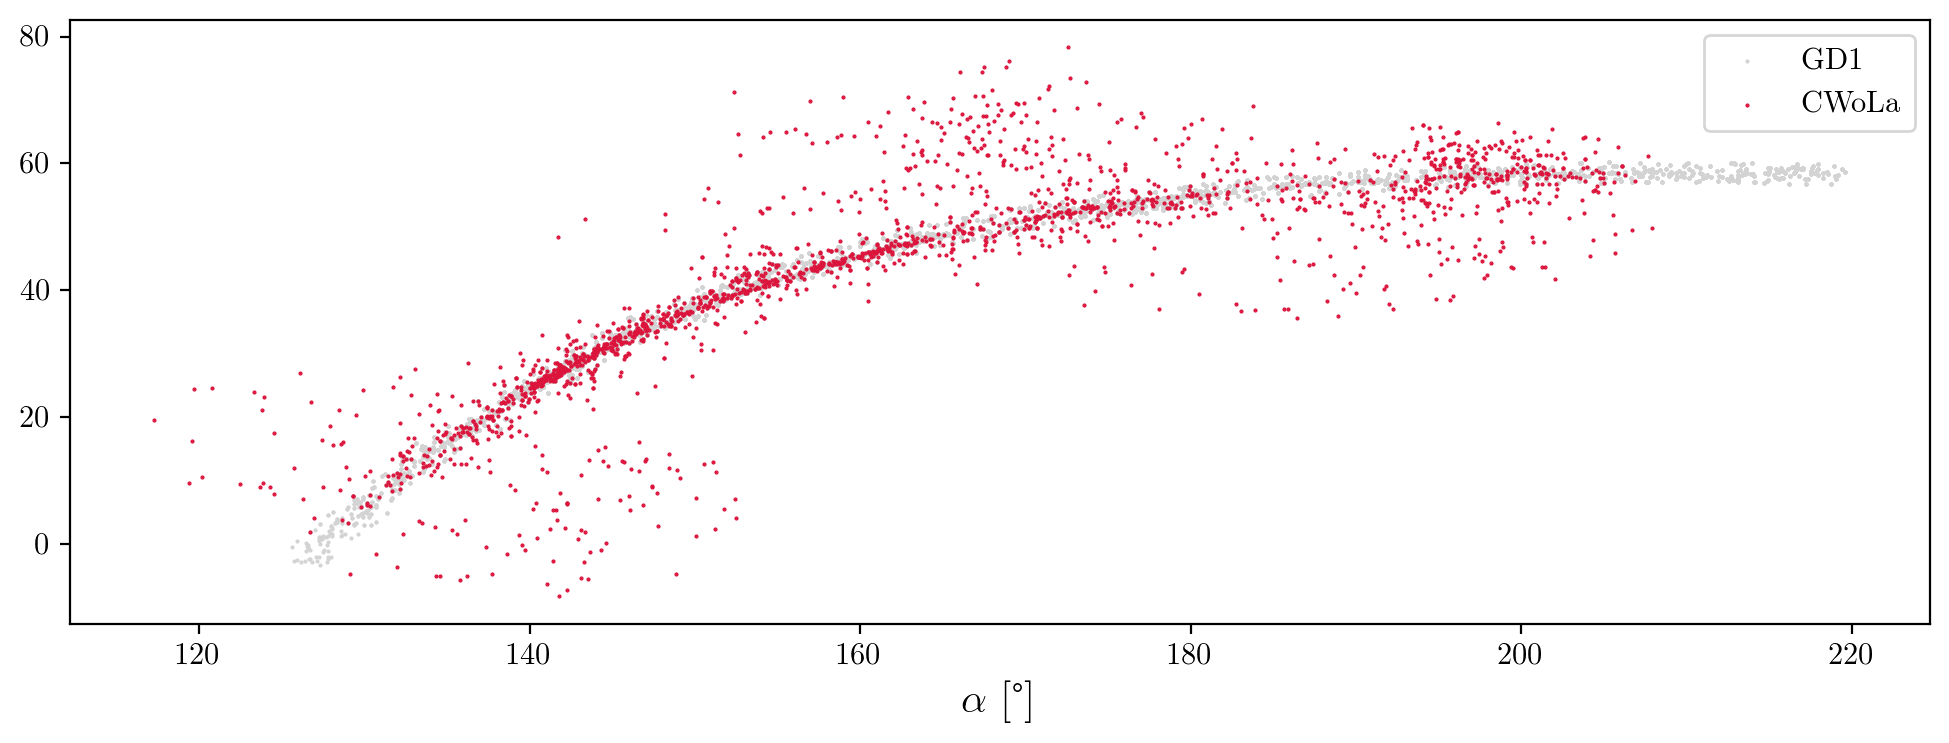

In [19]:
plt.figure(dpi=200, figsize=(12,4))
plt.scatter(all_gd1_stars.α, all_gd1_stars.δ, marker='.', s=1, 
            color="lightgray", label="GD1")
plt.scatter(cwola_stars.α, cwola_stars.δ, marker='.', s=1, 
            color="crimson", label="CWoLa")
plt.legend();
plt.xlabel(r"$\alpha$ [\textdegree]");

In [17]:
cwola_stars.stream.value_counts()

False    1516
True      584
Name: stream, dtype: int64